# Linear Regression Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
lcn = pd.read_csv("LungCapData.csv")

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [30]:
lcn.tail()

,LungCap,Age,Height,Smoke,Gender,Caesarean
720,5.725,9,56.0,0,1,0
721,9.050,18,72.0,1,0,1
722,3.850,11,60.5,1,1,0
723,9.825,15,64.9,0,1,0
724,7.100,10,67.7,0,0,0


In [4]:
# Problem statment
# I want to build a predictive model to predict the Lungcap(Lung capacity) Value
# Lungcap :  Capcity of the human lungs
# Age  : Age in years
# height in Inches
# Smoke( no means does not smoke ; yes  smokes)
# Gender male , female
# Caesarean( No , Yes)

In [5]:
# Checking for any null values in the datasets
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
# convert non numeric value into numeric by replace or use dummies - encoding
lcn.Smoke.replace({'no' : 0 , 'yes' :1 } , inplace = True )
lcn.Gender.replace( { "male" :0 , "female" :1} , inplace = True)
lcn.Caesarean.replace({"no" :0 , "yes" :1} , inplace = True)

In [7]:
lcn.head(10)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0
5,6.225,11,58.7,0,1,0
6,4.950,8,63.3,0,0,1
7,7.325,11,70.4,0,0,0
8,8.875,15,70.5,0,0,0
9,6.800,11,59.2,0,0,0


In [8]:
# Sampling - Split the given dataset into training and test datasets
# when ever we build a predictive model
# divide data in train data ans test data
# train data model is build & test data preiction is done(testing is done)

lcn_y = lcn.iloc[: , 0]   
#In this predictive model, we are going to predict the luncapacity of a person based on other features
# 0 th column is the luncap, for which prediction is to be done
# Luncap is the dependent variable

lcn_x = lcn.iloc[: , 1:6]
# Seperate the columns starting from age to Caesarean
#independant variables

# Seprated the X and Y

scikit-learn Machine Learning in Python

Simple and efficient tools for predictive data analysis Accessible to everybody, and reusable in various contexts Built on NumPy, SciPy, and matplotlib Open source, commercially usable - BSD license

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# lcn_x , lcn_y
# lcn_x into lcn_x_train, lcn_x_test
# lcn_y into lcn_y_train, lcn_y_test
# split the datsets into 80% for training and 20% for testing

lcn_x_train, lcn_x_test, lcn_y_train , lcn_y_test  =  train_test_split( lcn_x , lcn_y , test_size = .2 , random_state = 101)

# Random sampling any row can be part of either train or test datasets

In [11]:
lcn.shape

(725, 6)

In [12]:
print(lcn_x_train.shape)
print(lcn_y_train.shape)
# records should match

(580, 5)
(580,)


In [13]:
print(lcn_x_test.shape)
print(lcn_y_test.shape)
# records should match

(145, 5)
(145,)


When to choose Linear regression model?

For continuous target variable/ predictive column...

Linear regression is used for finding linear relationship between target and one or more predictors.

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable.


Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression.

Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting.


-------------------------------------------------------------------------------------------

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x) 

So, this regression technique finds out a linear relationship between x (input) and y(output)

y = mx + c where m is the coefficient , c is the intercept

In the equation y = mx + c the value of m is called the slope, (or gradient), of the line. 

It can be positive, negative or zero.... 

The value of c is called the vertical intercept of the line. 

http://images.slideplayer.com/16/5256836/slides/slide_3.jpg

If the dependent variable increases on the Y-axis and independent variable increases on X-axis then such a relationship is termed as a Positive linear relationship.

If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis then such a relationship is called a negative linear relationship.

In [14]:
from sklearn import linear_model

In [15]:
reg= linear_model.LinearRegression()

In [16]:
# fit method is used to build the model
reg.fit(lcn_x_train , lcn_y_train) # X ,Y and not (Y ,X)

LinearRegression()

Name of the model is REG

LungCap = C + m1* Age + m2*Height + m3*Smo + m4*Gender + m5*Ces + Error

In [17]:
lcn_x_train.head(1)

,Age,Height,Smoke,Gender,Caesarean
551,7,51.2,0,1,0


In [18]:
reg.coef_  #m

array([ 0.18687287,  0.25370122, -0.60703588, -0.37646409, -0.1482951 ])

In [19]:
reg.intercept_  #C

-10.642458657936237

In [34]:
#Now test the model, by prediction
pred  = reg.predict(lcn_x_test)
actual  = lcn_y_test

In [44]:
print(pred)
print(actual)

[ 7.54766894  5.68204508  6.32558014 10.79158567  3.47236857  5.63130484
  7.27875094  4.71141679  8.91580848  4.95831192 11.72347409  7.56462836
  5.91965819 10.37350125  4.21082044  7.82945863  5.41906185  7.88227746
  4.6579582   8.00433113 11.06137499  7.67539087  8.5790287   8.42968843
  8.20135733  6.05850917  9.8407287   9.43496886  8.03985459 11.47657896
  7.90740517  6.75959055 10.03728811  4.85683143 10.93884735  9.04513502
  3.28821404  8.88635062  4.40425698  7.48579965  5.69404545  8.71988882
  7.64073873  8.61160225  7.08915972  5.98920489  6.82617649  8.01569174
  8.52597463  6.22001192  4.28668839  8.39503629  6.52173503  5.43474542
  9.92900154 10.49515758 13.22031126  4.10005794  1.03436096  3.05035852
 10.78230365 11.30307584 10.46074067  4.86363752  6.48708289  7.91052805
 11.23896584  2.01698961  4.45499722  9.76230451  9.77678081 10.73812708
  9.97045976  7.11869788 10.02528774  9.20416183  7.3006117   8.28139332
  8.57135848  3.92367436  5.85963593  9.36838293  9

In [35]:
#This data frame has the predicted and the actual values, to so side by side comparision
pred_actual = pd.DataFrame( {"Predicted_Value" : pred   , "Actual_Values" :actual})

In [36]:
pred_actual.head()

,Predicted_Value,Actual_Values
642,7.547669,7.950
269,5.682045,8.775
267,6.325580,7.350
351,10.791586,11.675
613,3.472369,3.700


How to evaluate the model?

In linear regression, objective is to find the best fit line that means the error between predicted values and actual values should be minimized

The best fit line will have the least error

Metrics are used to evalaute your model and reduce the error in the prediction 

R square - SSR/SSR+SSE (ALWAYS RANGE BETWEEN O TO 1, HIGHER THE VALUE BETTER IS THE MODEL)

Adjusted R Square(ALWAYS RANGE BETWEEN O TO 1, HIGHER THE VALUE BETTER IS THE MODEL, SOMETIMES -VE )

MSE : MEAN SQUARE ERROR ( SHOULD BE LOWER FOR THE BETTER MODEL)

MAE : MEAN ABSOLUTE ERROR ( SHOULD BE LOWER FOR THE BETTER MODEL)

What is the SST? 

The sum of squares total, denoted SST, is the squared differences between the observed dependent variable and its mean.

There is another notation for the SST. It is TSS or total sum of squares.

What is the SSR? 

The second term is the sum of squares due to regression, or SSR. It is the sum of the differences between the predicted value and the mean of the dependent variable

What is the SSE? 

The last term is the sum of squares error, or SSE. The error is the difference between the observed value and the predicted value.


In [24]:
reg.score(lcn_x_train , lcn_y_train)  # value of R square : SSR/SSR+SSE

0.8676116408504295

In [25]:
# Adjusted Rsquare
#  1 - [ (1-Rsquare)* ( n-1) / ( n-k-1) ]
#  K = 5 (INDEPENDANT VARIABLES)
#  n = 580 (NO OF RECORDS)

In [31]:
adjr_Rsqure =  1 - ((1 - .8676116408504295 )*(580-1)  / ( 580 - 5 -1) )

In [32]:
adjr_Rsqure

0.8664584321470361

In [29]:
# MSE - mean of sum of squared errors ( for 580 records, sum of squared errors)

# Mean Absolute Error (MAE) and Root mean squared error (RMSE) 
#are two of the most common metrics used to measure accuracy for continuous variables

In [37]:
from sklearn import metrics
lcn_MAE  = metrics.mean_absolute_error(actual , pred)
lcn_MSE  = metrics.mean_squared_error(actual , pred)

In [38]:
lcn_MAE 

0.9511491414785203

In [39]:
lcn_MSE

1.429105363503631

In [40]:
# RMSE ( Root Mean square error) 
pow(lcn_MSE ,.5)# RMSE

1.1954519494750222

In [41]:
error  = pred - actual

(array([ 4.,  6., 20., 23., 39., 21., 17.,  9.,  4.,  2.]),
 array([-3.09295492, -2.45337401, -1.81379309, -1.17421218, -0.53463126,
         0.10494965,  0.74453056,  1.38411148,  2.02369239,  2.66327331,
         3.30285422]),
 <BarContainer object of 10 artists>)

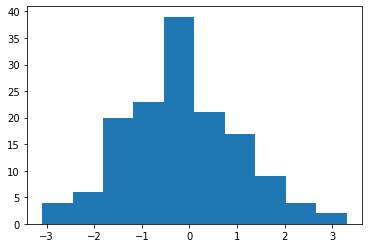

In [42]:
plt.hist(error)

C:\Users\Zenith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LungCap', ylabel='Density'>

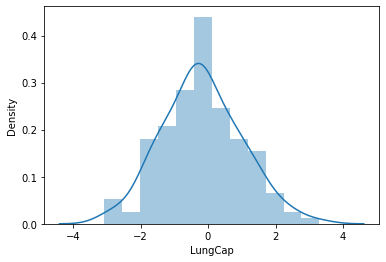

In [43]:
import seaborn as sns
sns.distplot(error)

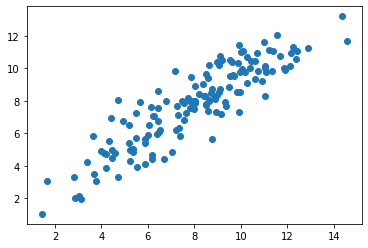

In [37]:
plt.scatter(lcn_y_test , pred)

In [38]:
pred

array([ 7.54766894,  5.68204508,  6.32558014, 10.79158567,  3.47236857,
        5.63130484,  7.27875094,  4.71141679,  8.91580848,  4.95831192,
       11.72347409,  7.56462836,  5.91965819, 10.37350125,  4.21082044,
        7.82945863,  5.41906185,  7.88227746,  4.6579582 ,  8.00433113,
       11.06137499,  7.67539087,  8.5790287 ,  8.42968843,  8.20135733,
        6.05850917,  9.8407287 ,  9.43496886,  8.03985459, 11.47657896,
        7.90740517,  6.75959055, 10.03728811,  4.85683143, 10.93884735,
        9.04513502,  3.28821404,  8.88635062,  4.40425698,  7.48579965,
        5.69404545,  8.71988882,  7.64073873,  8.61160225,  7.08915972,
        5.98920489,  6.82617649,  8.01569174,  8.52597463,  6.22001192,
        4.28668839,  8.39503629,  6.52173503,  5.43474542,  9.92900154,
       10.49515758, 13.22031126,  4.10005794,  1.03436096,  3.05035852,
       10.78230365, 11.30307584, 10.46074067,  4.86363752,  6.48708289,
        7.91052805, 11.23896584,  2.01698961,  4.45499722,  9.76

LungCap = C + m1* Age + m2Height + m3Smo + m4Gender + m5Ces MODEL A (Adj R square .83)

LungCap = C + m1* Age + m2Height + m3Smo MODEL B (Adj R square .829)

LungCap = C + m1* Age + m2Height + m3Smo MODEL c (Adj R square .78)